# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import gdown
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [3]:
#membaca dataset https://drive.google.com/file/d/1JEC0TyRq9ZLV8nWbGg1jQAAab8mq7bHl/view?usp=sharing
file_id = "1JEC0TyRq9ZLV8nWbGg1jQAAab8mq7bHl"
url = f"https://drive.google.com/uc?id={file_id}"
output = "dataset_inisiasi.csv"

gdown.download(url, output, quiet=False)

df = pd.read_csv(output)
df.head()

Downloading...
From (original): https://drive.google.com/uc?id=1JEC0TyRq9ZLV8nWbGg1jQAAab8mq7bHl
From (redirected): https://drive.google.com/uc?id=1JEC0TyRq9ZLV8nWbGg1jQAAab8mq7bHl&confirm=t&uuid=ecf90b06-eacb-4dc8-bd05-ea2c7110dc1c
To: /content/dataset_inisiasi.csv
100%|██████████| 798M/798M [00:09<00:00, 83.8MB/s]


,Order_ID,Customer_ID,Customer_Type,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region,Order_Date,Cluster
0,ORD1,CUS1496,B2B,Vio Wasser,Water,1.66,53,0.10,79.18,Baden-Württemberg,2023-08-23,4
1,ORD1,CUS1496,B2B,Evian,Water,1.56,90,0.10,126.36,Baden-Württemberg,2023-08-23,4
2,ORD1,CUS1496,B2B,Sprite,Soft Drinks,1.17,73,0.05,81.14,Baden-Württemberg,2023-08-23,1
3,ORD1,CUS1496,B2B,Rauch Multivitamin,Juices,3.22,59,0.10,170.98,Baden-Württemberg,2023-08-23,4
4,ORD1,CUS1496,B2B,Gerolsteiner,Water,0.87,35,0.10,27.40,Baden-Württemberg,2023-08-23,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8999910 entries, 0 to 8999909
Data columns (total 12 columns):
 #   Column         Dtype  
---  ------         -----  
 0   Order_ID       object 
 1   Customer_ID    object 
 2   Customer_Type  object 
 3   Product        object 
 4   Category       object 
 5   Unit_Price     float64
 6   Quantity       int64  
 7   Discount       float64
 8   Total_Price    float64
 9   Region         object 
 10  Order_Date     object 
 11  Cluster        int64  
dtypes: float64(3), int64(2), object(7)
memory usage: 824.0+ MB


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [4]:
# Pisahkan fitur (X) dan target (y)
X = df.drop(columns=['Cluster'])
y = df['Cluster']

# Split data menjadi set pelatihan dan set uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tampilkan bentuk set pelatihan dan set uji untuk memastikan split
print(f"Training set shape: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Test set shape: X_test={X_test.shape}, y_test={y_test.shape}")

Training set shape: X_train=(7199928, 11), y_train=(7199928,)
Test set shape: X_test=(1799982, 11), y_test=(1799982,)


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [5]:
# Buat instance LabelEncoder
label_encoder = LabelEncoder()

# List kolom kategori
categorical_cols = ["Customer_Type", "Product", "Category", "Region"]

# Encode kolom kategorikal
for column in categorical_cols:
    df[column] = label_encoder.fit_transform(df[column])
    X_train[column] = label_encoder.fit_transform(X_train[column])
    X_test[column] = label_encoder.transform(X_test[column]) 

# Tampilkan DataFrame untuk memastikan encoding telah diterapkan
df.head()

,Order_ID,Customer_ID,Customer_Type,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region,Order_Date,Cluster
0,ORD1,CUS1496,0,42,3,1.66,53,0.10,79.18,0,2023-08-23,4
1,ORD1,CUS1496,0,9,3,1.56,90,0.10,126.36,0,2023-08-23,4
2,ORD1,CUS1496,0,38,2,1.17,73,0.05,81.14,0,2023-08-23,1
3,ORD1,CUS1496,0,29,1,3.22,59,0.10,170.98,0,2023-08-23,4
4,ORD1,CUS1496,0,12,3,0.87,35,0.10,27.40,0,2023-08-23,1


In [6]:
# Hapus kolom yang tidak relevan
X_train = X_train.drop(columns=["Order_ID", "Customer_ID", "Order_Date"], errors="ignore")
X_test = X_test.drop(columns=["Order_ID", "Customer_ID", "Order_Date"], errors="ignore")

In [7]:
# Buat instance MinMaxScaler
scaler = MinMaxScaler()

# Normalisasi semua kolom numerik
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

In [8]:
# K-Nearest Neighbors (KNN)
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

print("Model KNN training selesai.")

Model KNN training selesai.


In [9]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

print("Model Decision Tree training selesai.")

Model Decision Tree training selesai.


Dalam proyek ini, digunakan lima algoritma klasifikasi, yaitu K-Nearest Neighbors (KNN) dan Decision Tree (DT). Setiap algoritma memiliki pendekatan berbeda dalam mempelajari pola dari data pelatihan untuk melakukan prediksi pada data uji.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

In [10]:
#Lakukan Prediksi Menggunakan Data Uji
y_pred_knn = knn.predict(X_test)
y_pred_dt = dt.predict(X_test)

In [11]:
#Hitung Metrik Evaluasi (Accuracy, Precision, Recall, F1-Score)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

models = {
    "KNN": y_pred_knn,
    "Decision Tree": y_pred_dt,
}

for model_name, y_pred in models.items():
    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average="weighted")
    recall = recall_score(y_test, y_pred, average="weighted")
    f1 = f1_score(y_test, y_pred, average="weighted")

    print(f"{model_name}:")
    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print("-" * 30)

KNN:
Accuracy: 0.9538
Precision: 0.9537
Recall: 0.9538
F1-Score: 0.9537
------------------------------
Decision Tree:
Accuracy: 0.9999
Precision: 0.9999
Recall: 0.9999
F1-Score: 0.9999
------------------------------


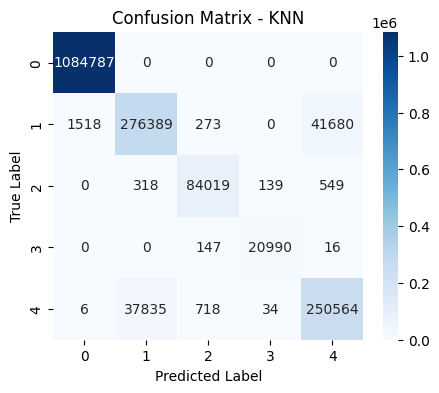

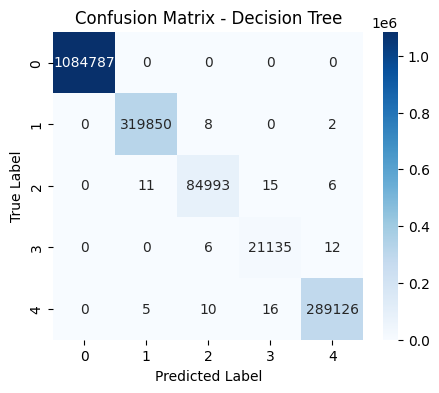

In [12]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

for model_name, y_pred in models.items():
    cm = confusion_matrix(y_test, y_pred)
    
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=set(y_test), yticklabels=set(y_test))
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

Dari hasil di atas, terlihat bahwa Decision Tree memiliki metrik evaluasi yang jauh lebih tinggi dibandingkan dengan KNN. Namun, perlu diperhatikan kemungkinan overfitting pada Decision Tree, yang dapat menyebabkan model tidak bekerja dengan baik pada data yang belum pernah dilihat sebelumnya.
Sebaliknya, KNN memiliki akurasi yang lebih rendah, tetapi lebih stabil dan cenderung lebih baik dalam melakukan generalisasi, terutama jika dataset berskala besar dan memiliki variasi yang cukup.

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [ ]:
#Type your code here

## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

In [ ]:
#Type your code here

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan):
- KNN memiliki akurasi 95.38%, yang menunjukkan bahwa model cukup baik dalam mengenali pola data, tetapi masih ada beberapa kesalahan klasifikasi.
- Decision Tree memiliki akurasi hampir 100%, yang tampaknya terlalu sempurna dan bisa menjadi indikasi overfitting—di mana model terlalu menghafal data pelatihan sehingga mungkin tidak bekerja sebaik itu pada data baru.


2. Identifikasi kelemahan model, seperti:
- Potensi Overfitting pada Decision Tree
Akurasi yang terlalu tinggi (99.99%) pada Decision Tree bisa menjadi tanda overfitting. Model mungkin telah menghafal pola dalam data pelatihan dan bisa memiliki kinerja yang lebih buruk jika diuji pada data baru.
- KNN vs Decision Tree dalam Generalisasi Data
KNN memiliki kinerja yang lebih realistis, dengan akurasi sekitar 95%.KNN lebih tahan terhadap overfitting dibandingkan Decision Tree karena pendekatannya yang berbasis tetangga terdekat.

3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan:
- Jika Decision Tree overfitting:
1). Kurangi kedalaman pohon (max_depth) untuk membuat model lebih general.
2). Gunakan pruning untuk menghilangkan cabang yang terlalu spesifik terhadap data pelatihan.
- Jika KNN masih bisa ditingkatkan:
1). Eksperimen dengan jumlah tetangga (n_neighbors) untuk mencari nilai optimal.
2). Normalisasi data agar jarak antar titik lebih seimbang.

